In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:\\DSEB 63 - NEU\\Năm BA\\Visualization\\Data\\Data\\dseb63_final_project_DP_dataset\\dseb63_previous_application.csv')

In [3]:
df.head(5)

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR
0,2030495,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,...,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,293189
1,1696966,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,...,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,293189
2,2154916,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,...,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,293189
3,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,...,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,91587
4,1536272,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,...,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,91587


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1413701 non-null  int64  
 1   NAME_CONTRACT_TYPE           1413701 non-null  object 
 2   AMT_ANNUITY                  1106483 non-null  float64
 3   AMT_APPLICATION              1413701 non-null  float64
 4   AMT_CREDIT                   1413700 non-null  float64
 5   AMT_DOWN_PAYMENT             664161 non-null   float64
 6   AMT_GOODS_PRICE              1094176 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 8   HOUR_APPR_PROCESS_START      1413701 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  int64  
 11  RATE_DOWN_PAYMENT            664161 non-null   float64
 12  RATE_INTEREST_PRIMARY        4791 non-null

# Column Description

In [5]:
description = pd.read_csv('D:\\DSEB 63 - NEU\\Năm BA\\Visualization\\Data\\Data\\dseb63_columns_description.csv',encoding='latin',index_col=0)
description = description[description['Table'].str.contains('previous_application')].drop(columns = 'Table',axis = 0).set_index("Row")
description

,Description,Special
Row,,
SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
SK_ID_CURR,ID of loan in our sample,hashed
NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loa...",NaN
AMT_ANNUITY,Annuity of previous application,NaN
AMT_APPLICATION,For how much credit did client ask on the prev...,NaN
AMT_CREDIT,Final credit amount on the previous applicatio...,NaN
AMT_DOWN_PAYMENT,Down payment on the previous application,NaN
AMT_GOODS_PRICE,Goods price of good that client asked for (if ...,NaN
WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply ...,NaN


# 1st Cleaning

In [6]:
# Check null
df.isnull().sum(axis = 0)

SK_ID_PREV                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     307218
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                749540
AMT_GOODS_PRICE                 319525
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               749540
RATE_INTEREST_PRIMARY          1408910
RATE_INTEREST_PRIVILEGED       1408910
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 694672
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE                         0
SELLERPLACE_AREA         

In [7]:
# Remove all cols that have %null >= 90%
## find all cols
cols_found = df.loc[:,(df.isnull().sum(axis = 0) / df.shape[0]) >= 0.9].columns
cols_found
## In here I find that 2 tables have %null >= 90% which are ['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED'] 
## -> we can remove this from the table
new_df = df.drop(columns=['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED'],axis= 0) 


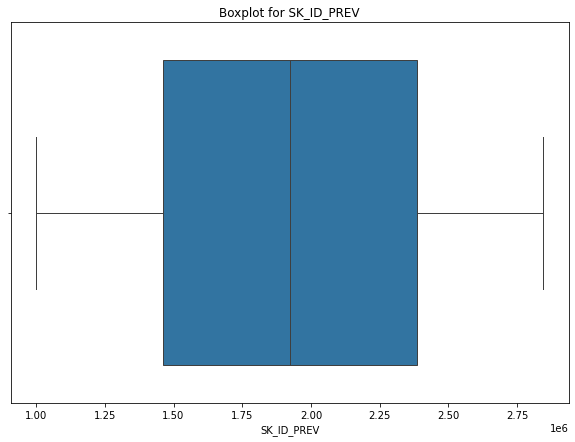

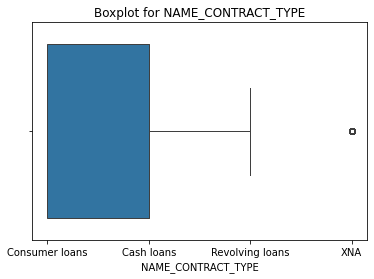

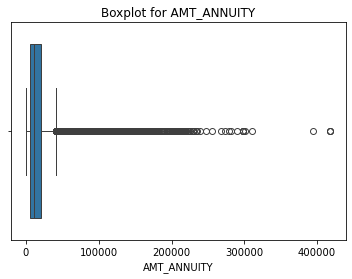

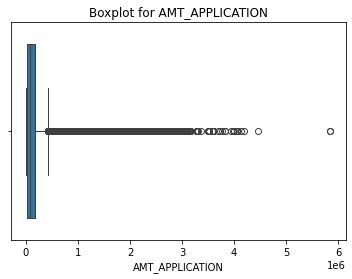

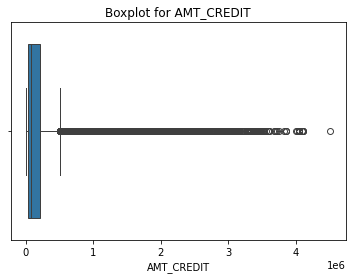

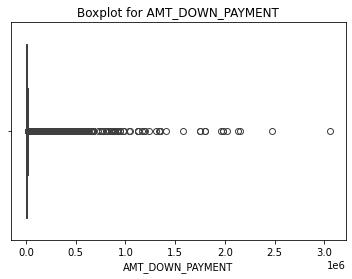

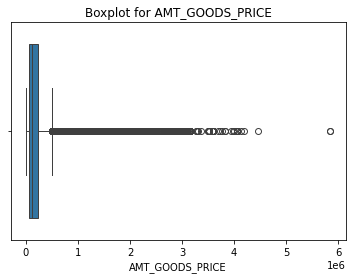

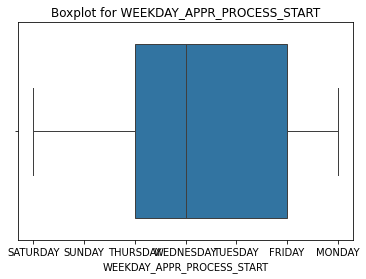

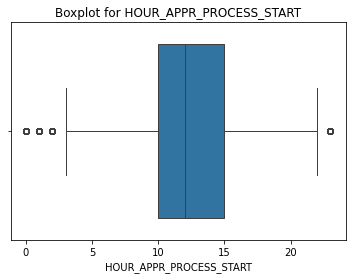

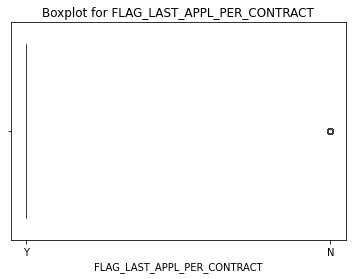

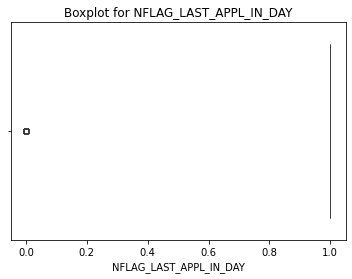

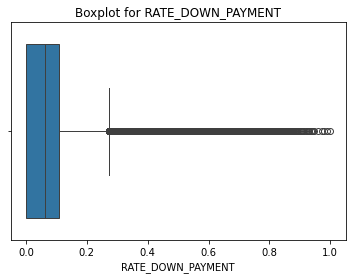

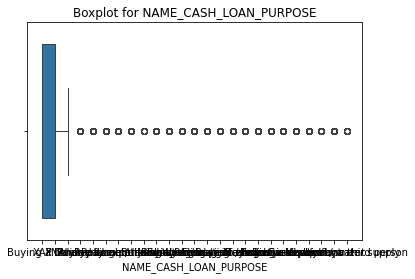

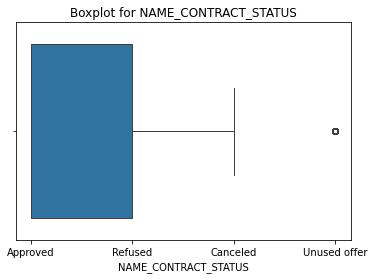

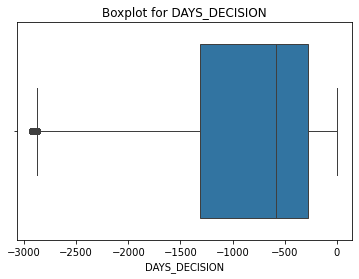

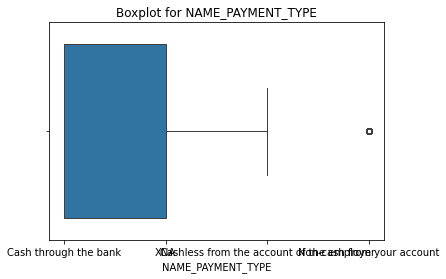

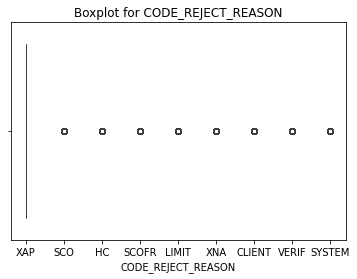

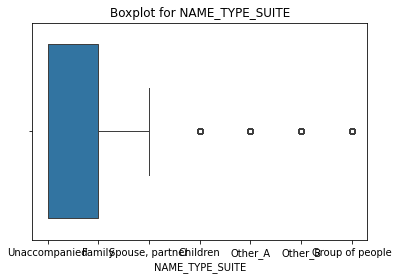

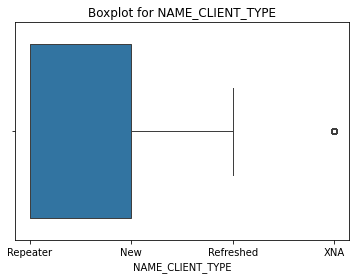

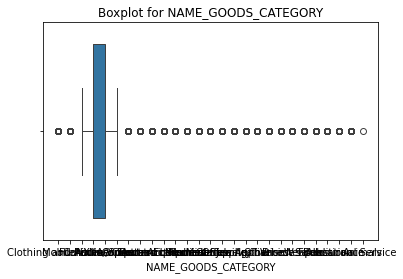

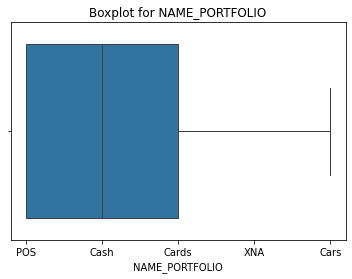

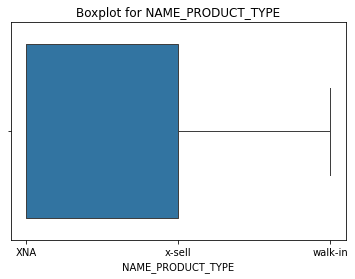

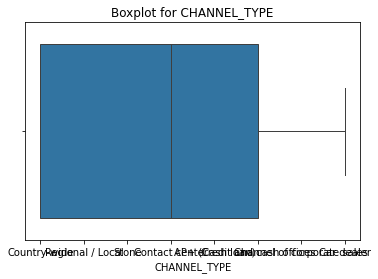

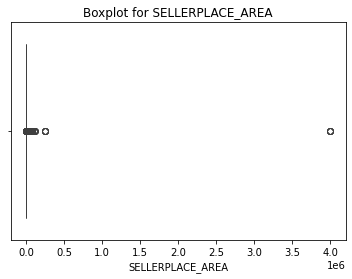

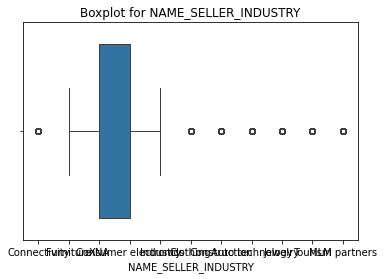

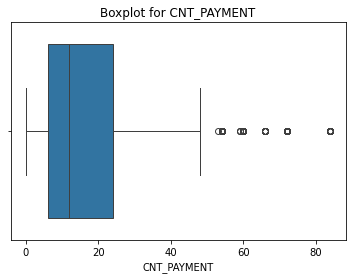

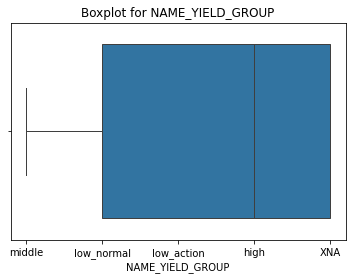

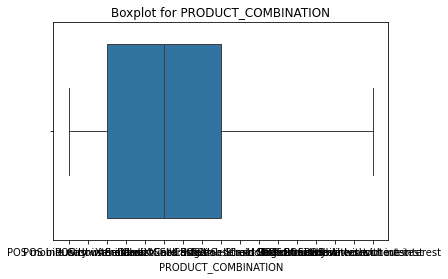

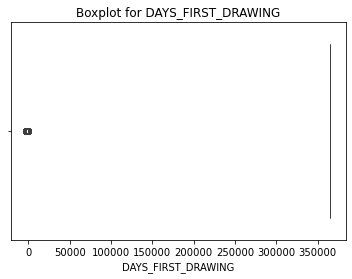

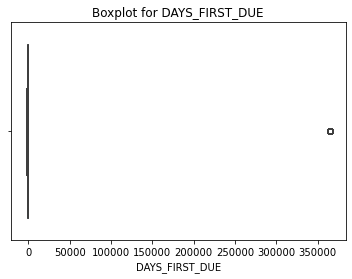

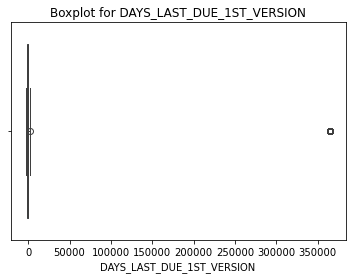

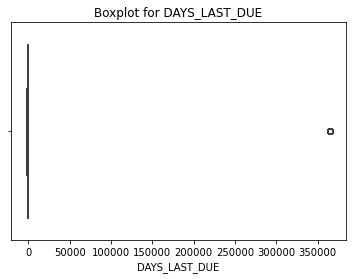

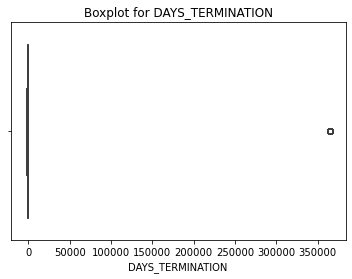

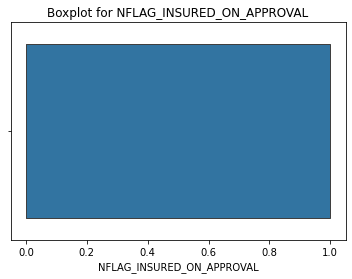

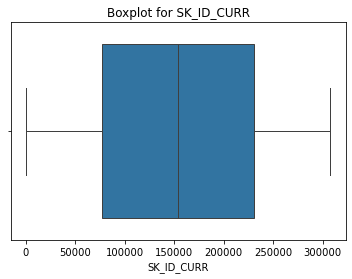

In [8]:
## Check outliters
plt.figure(figsize=(10, 7))

for column in new_df.columns:
    # Create a boxplot for the column
    sns.boxplot(x=new_df[column])

    # Set the title of the plot
    plt.title(f'Boxplot for {column}')

    # Show the plot
    plt.show()

In [9]:
##Check valid values in each col
### Split df into 2 small ones, numerical and categorical 
numerical_data = new_df._get_numeric_data()
categorical_data = new_df.drop(columns=numerical_data.columns)

#### Numerical data

In [10]:
## Because all is numerical_data so i will check all the available values
for i in numerical_data.columns:
    great0 = numerical_data[i][numerical_data[i] > 0].count()
    equal0 =  numerical_data[i][numerical_data[i] == 0].count()
    smal0 =numerical_data[i][numerical_data[i] < 0].count()
    nan_total = numerical_data[i].isnull().sum()
    other_value = numerical_data.shape[0] - great0 - smal0 - nan_total - equal0
    print(f'{i}  has     >0 {great0},  =0 {equal0}  ,   <0 {smal0},    nan: {nan_total},   other values: {other_value}')


SK_ID_PREV  has     >0 1413701,  =0 0  ,   <0 0,    nan: 0,   other values: 0
AMT_ANNUITY  has     >0 1105243,  =0 1240  ,   <0 0,    nan: 307218,   other values: 0
AMT_APPLICATION  has     >0 1088399,  =0 325302  ,   <0 0,    nan: 0,   other values: 0
AMT_CREDIT  has     >0 1137123,  =0 276577  ,   <0 0,    nan: 1,   other values: 0
AMT_DOWN_PAYMENT  has     >0 350184,  =0 313975  ,   <0 2,    nan: 749540,   other values: 0
AMT_GOODS_PRICE  has     >0 1088416,  =0 5760  ,   <0 0,    nan: 319525,   other values: 0
HOUR_APPR_PROCESS_START  has     >0 1413609,  =0 92  ,   <0 0,    nan: 0,   other values: 0
NFLAG_LAST_APPL_IN_DAY  has     >0 1408657,  =0 5044  ,   <0 0,    nan: 0,   other values: 0
RATE_DOWN_PAYMENT  has     >0 350184,  =0 313975  ,   <0 2,    nan: 749540,   other values: 0
DAYS_DECISION  has     >0 0,  =0 0  ,   <0 1413701,    nan: 0,   other values: 0
SELLERPLACE_AREA  has     >0 726438,  =0 50680  ,   <0 636583,    nan: 0,   other values: 0
CNT_PAYMENT  has     >0 9845

##### Explain for the validation of each column values

#### Categorical Data

In [11]:
for i in categorical_data.columns[:8]:
    print(f'col {i} : {list(categorical_data[i].unique())}\n')

col NAME_CONTRACT_TYPE : ['Consumer loans', 'Cash loans', 'Revolving loans', 'XNA']

col WEEKDAY_APPR_PROCESS_START : ['SATURDAY', 'SUNDAY', 'THURSDAY', 'WEDNESDAY', 'TUESDAY', 'FRIDAY', 'MONDAY']

col FLAG_LAST_APPL_PER_CONTRACT : ['Y', 'N']

col NAME_CASH_LOAN_PURPOSE : ['XAP', 'XNA', 'Other', 'Buying a holiday home / land', 'Repairs', 'Everyday expenses', 'Payments on other loans', 'Urgent needs', 'Refusal to name the goal', 'Journey', 'Furniture', 'Buying a garage', 'Building a house or an annex', 'Education', 'Wedding / gift / holiday', 'Buying a home', 'Medicine', 'Purchase of electronic equipment', 'Buying a used car', 'Buying a new car', 'Car repairs', 'Business development', 'Hobby', 'Gasification / water supply', 'Money for a third person']

col NAME_CONTRACT_STATUS : ['Approved', 'Refused', 'Canceled', 'Unused offer']

col NAME_PAYMENT_TYPE : ['Cash through the bank', 'XNA', 'Cashless from the account of the employer', 'Non-cash from your account']

col CODE_REJECT_REASON : 

In [12]:
for i in categorical_data.columns[8:]:
    print(f'col {i} : {list(categorical_data[i].unique())}\n')

col NAME_CLIENT_TYPE : ['Repeater', 'New', 'Refreshed', 'XNA']

col NAME_GOODS_CATEGORY : ['Mobile', 'Clothing and Accessories', 'Furniture', 'XNA', 'Audio/Video', 'Consumer Electronics', 'Computers', 'Photo / Cinema Equipment', 'Sport and Leisure', 'Auto Accessories', 'Construction Materials', 'Medicine', 'Homewares', 'Medical Supplies', 'Gardening', 'Jewelry', 'Office Appliances', 'Other', 'Tourism', 'Vehicles', 'Direct Sales', 'Weapon', 'Fitness', 'Education', 'Insurance', 'Additional Service', 'Animals']

col NAME_PORTFOLIO : ['POS', 'Cash', 'Cards', 'XNA', 'Cars']

col NAME_PRODUCT_TYPE : ['XNA', 'x-sell', 'walk-in']

col CHANNEL_TYPE : ['Country-wide', 'Regional / Local', 'Stone', 'Contact center', 'AP+ (Cash loan)', 'Credit and cash offices', 'Channel of corporate sales', 'Car dealer']

col NAME_SELLER_INDUSTRY : ['Connectivity', 'Furniture', 'XNA', 'Consumer electronics', 'Industry', 'Clothing', 'Construction', 'Auto technology', 'Jewelry', 'Tourism', 'MLM partners']

col NAME_

##### Explain for the validation of each columns values

# EDA Process

###                 Internal

### Univariate Analysis


##### Categorical data

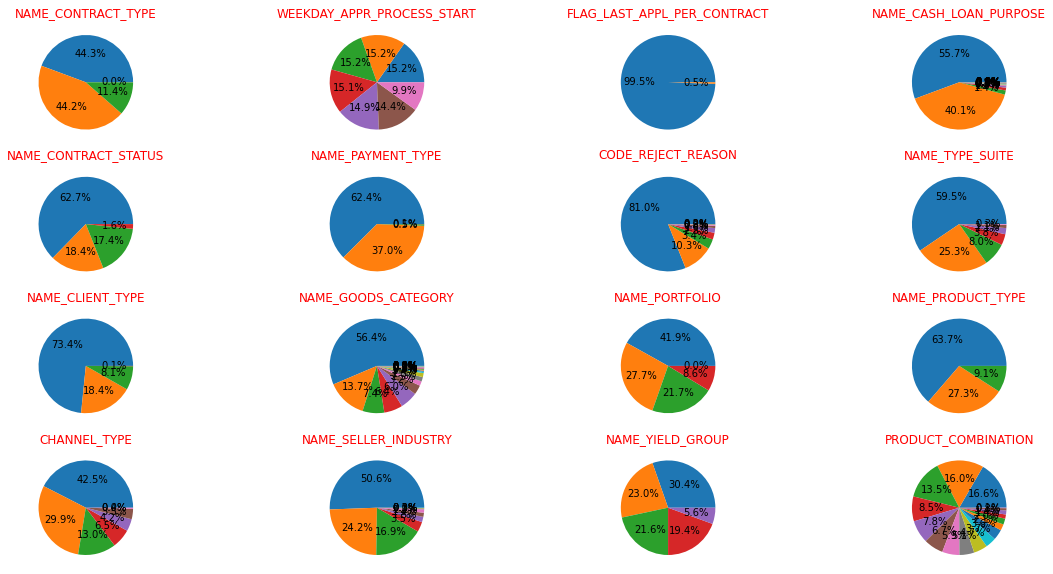

In [13]:
col= categorical_data.columns
fig, ax = plt.subplots(4,4,figsize=(20,10))
ite = 0 
for i in range(0,4):
    for j in range(0,4):
        sizes = categorical_data[col[ite]].value_counts(normalize=True)
        ax[i][j].pie(sizes, autopct='%1.1f%%')
        ax[i][j].set_title(col[ite], color = 'red')
        ite +=1
# Show the figure
plt.show()

##### From above pie chart I see that 1 columns that have an almost differences in percent of each categories, which name  is FLAG_LAST_APPL_PER_CONTRACT -> This feature does not affect a lot to our model -> This feature can be removed


### Multivariate Analysis

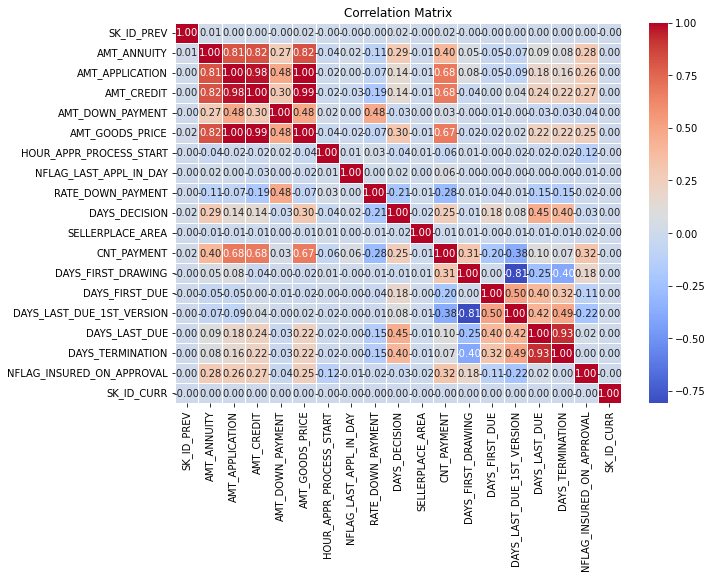

In [14]:
correlation_matrix = new_df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##### Note 
From this table, We can gain an insight that 4 feature have high relationships, AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT,AMT_GOODS_PRICE. Also, this trend can be seen in between DAY_LAST_DUE_1ST_VERSION and DAYS_FIRST_DRAWING, DAYS_TERMINATION and DAY_LAST_DUE -> This features need to be focused. 

External (means that what is the correlation between with the target value)


In [15]:
app_train = pd.read_csv('D:\\DSEB 63 - NEU\\Năm BA\Visualization\\Data\\Data\\dseb63_final_project_DP_dataset\\dseb63_application_train.csv')
app_train = app_train[['SK_ID_CURR','TARGET']]

In [16]:
merge_table = pd.merge(new_df,app_train,on='SK_ID_CURR',how='left')
merge_table.head()

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR,TARGET
0,2030495,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,...,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,293189,NaN
1,1696966,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,...,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,293189,NaN
2,2154916,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,...,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,293189,NaN
3,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,...,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,91587,0.0
4,1536272,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,...,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,91587,0.0


#### Numerical

In [17]:
numerical_data.columns

Index(['SK_ID_PREV', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT',
       'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'DAYS_DECISION',
       'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'SK_ID_CURR'],
      dtype='object')

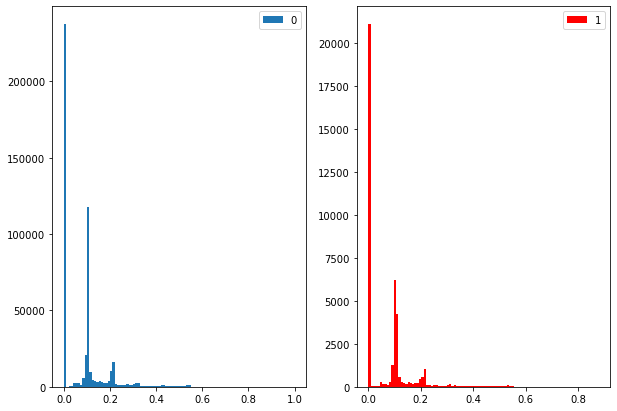

In [18]:
fig,ax = plt.subplots(1,2,figsize =(10,7))
# for col in numerical_data.columns:
class0 = merge_table[merge_table['TARGET']==0]['RATE_DOWN_PAYMENT']
class1 = merge_table[merge_table['TARGET']==1]['RATE_DOWN_PAYMENT']
ax[0].hist(class0,bins = 100,label = 0)
ax[1].hist(class1,bins = 100,color = 'red',label= 1)
ax[0].legend()
ax[1].legend()

In [19]:
new_df.columns

Index(['SK_ID_PREV', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'SK_ID_CURR'],
      dtype='object')